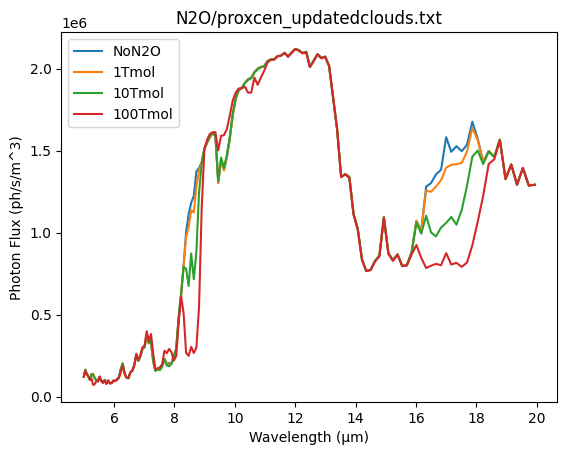

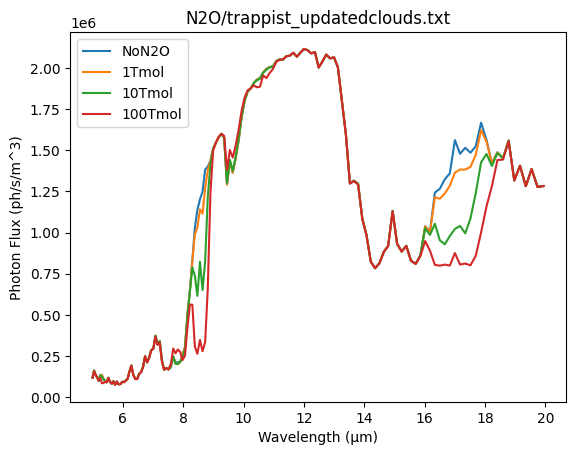

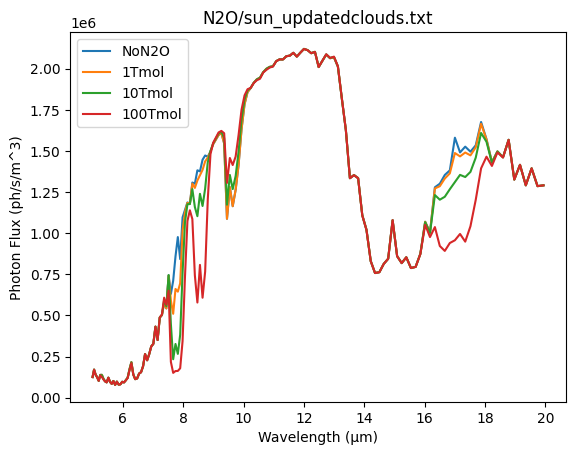

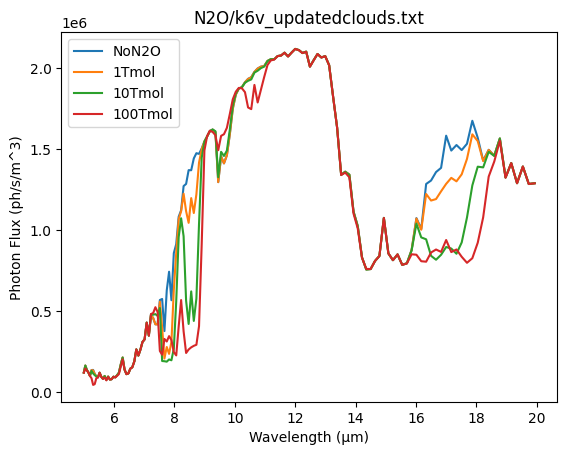

In [32]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt
import glob

# Figure 2 

for file in glob.glob('N2O/*.txt'):
    # Read the data file
    data = pd.read_csv(file, sep='\s+', skiprows=5)
    fig=plt.figure()
    plt.title(file)
    # Convert each spectral radiance column
    for column in ['NoN2O', '1Tmol', '10Tmol', '100Tmol']:
        
        # Convert wavelength to Astropy quantity
        wavelength_q = data['Wavelength'].values * u.um
        
        # Convert spectral radiance to Astropy quantity
        spectral_radiance_q = data[column].values * u.W / (u.sr * u.m**2 * u.um)
        
        # Calculate energy per photon
        E_photon = (const.h * const.c / wavelength_q).to(u.J)
        
        # Convert spectral radiance from per um to per m
        spectral_radiance_per_m = spectral_radiance_q.to(u.W / (u.sr * u.m**3))
        
        distance=5*u.pc.to(u.m)
        radius=const.R_earth.to(u.m)
        solid_angle = np.pi*radius**2/distance**2
        # Calculate photon flux
        data[f'{column}_ph/s/m^3'] = (spectral_radiance_per_m).to(u.ph / (u.s * u.m**3 *u.sr),equivalencies=u.spectral_density(wavelength_q))*solid_angle*u.sr
        plt.plot(data['Wavelength'],data[f'{column}_ph/s/m^3'],label=column)
    plt.xlabel('Wavelength (μm)')
    plt.ylabel('Photon Flux (ph/s/m^3)')
    plt.legend()


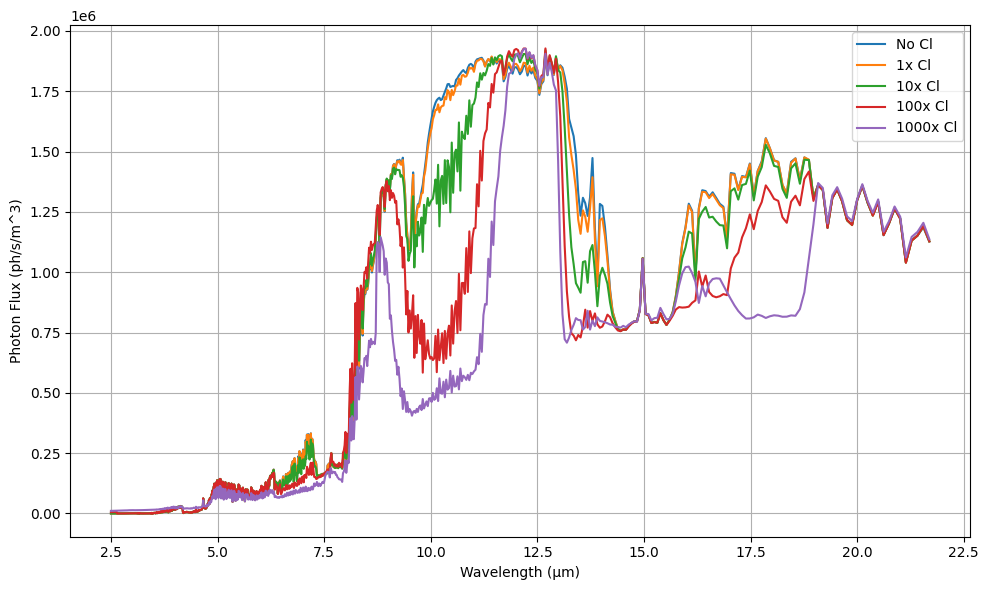

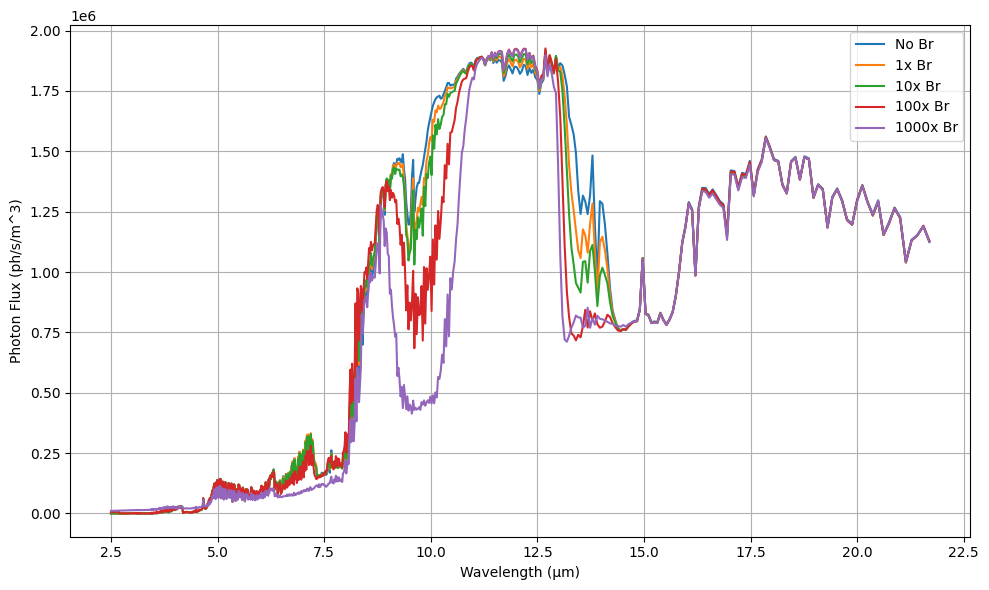

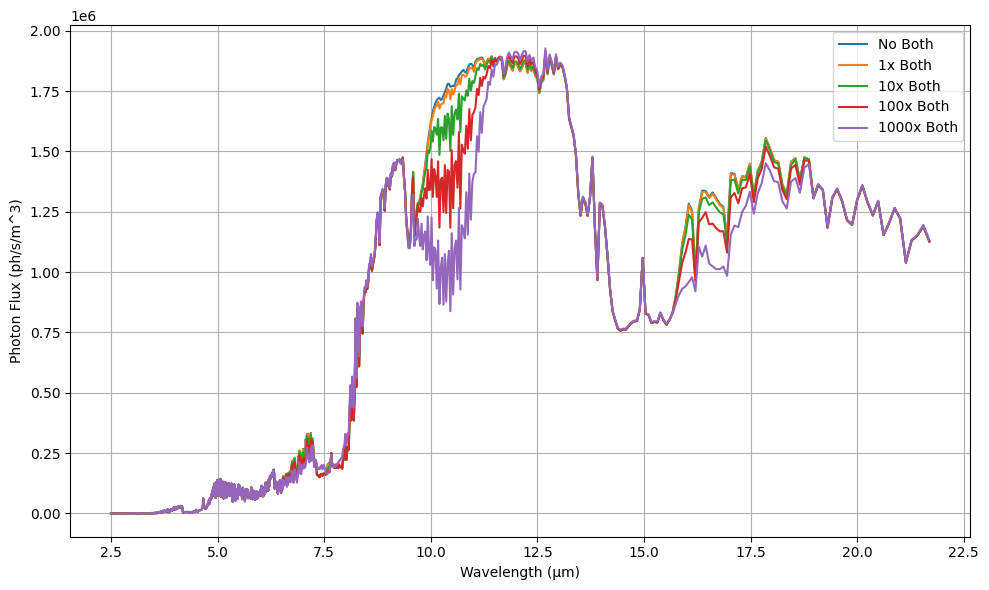

In [42]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

# Figure 3
data = pd.read_csv('CH3X/out_pcb.txt', skiprows=1, sep='\s+',header=None,
                   names=['Wl (um)', 'No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl',
                          'No Br', '1x Br', '10x Br', '100x Br', '1000x Br',
                          'No Both', '1x Both', '10x Both', '100x Both', '1000x Both'])

# Define the columns for each group
groups = {
    'Cl': ['No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl'],
    'Br': ['No Br', '1x Br', '10x Br', '100x Br', '1000x Br'],
    'Both': ['No Both', '1x Both', '10x Both', '100x Both', '1000x Both']
}

for group, columns in groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    for column in columns:
        # Convert wavelength to Astropy quantity
        wavelength_q = data['Wl (um)'].values * u.um
        
        # Convert spectral radiance to Astropy quantity
        spectral_radiance_q = data[column].values * u.W / (u.sr * u.m**2 * u.um)
        
        # Calculate energy per photon
        E_photon = (const.h * const.c / wavelength_q).to(u.J)
        
        # Convert spectral radiance from per um to per m
        spectral_radiance_per_m = spectral_radiance_q.to(u.W / (u.sr * u.m**3))
        
        distance = 5 * u.pc.to(u.m)
        radius = const.R_earth.to(u.m)
        solid_angle = np.pi * radius**2 / distance**2
        
        # Calculate photon flux
        photon_flux = (spectral_radiance_per_m).to(
            u.ph / (u.s * u.m**3 * u.sr),
            equivalencies=u.spectral_density(wavelength_q)
        ) * solid_angle * u.sr
        
        # Plot the data
        ax.plot(data['Wl (um)'], photon_flux, label=column)

    ax.set_xlabel('Wavelength (μm)')
    ax.set_ylabel('Photon Flux (ph/s/m^3)')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()


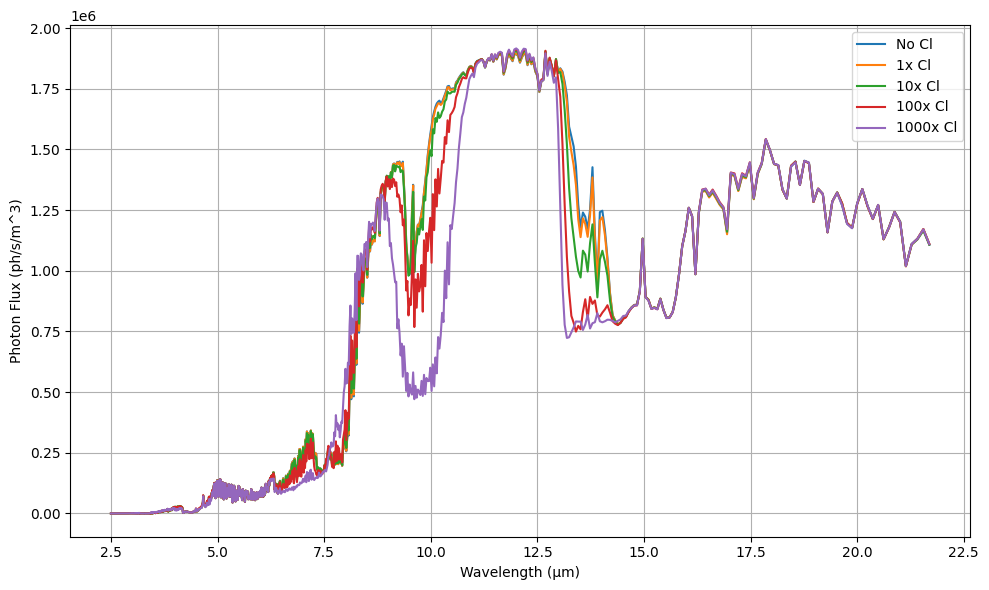

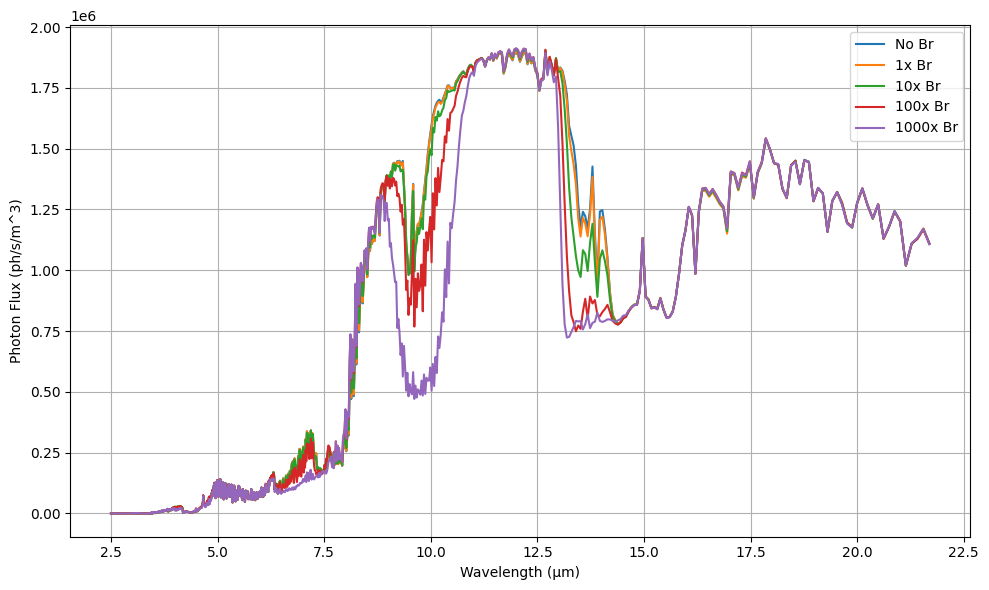

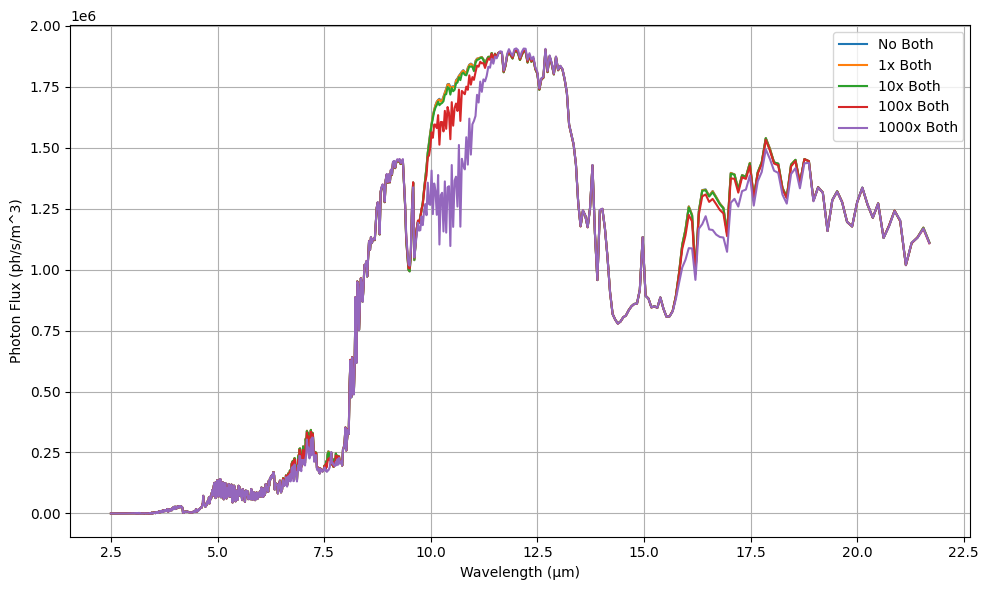

In [43]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

# Figure 4
data = pd.read_csv('CH3X/out_adl.txt', skiprows=1, sep='\s+',header=None,
                   names=['Wl (um)', 'No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl',
                          'No Br', '1x Br', '10x Br', '100x Br', '1000x Br',
                          'No Both', '1x Both', '10x Both', '100x Both', '1000x Both'])

# Define the columns for each group
groups = {
    'Cl': ['No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl'],
    'Br': ['No Br', '1x Br', '10x Br', '100x Br', '1000x Br'],
    'Both': ['No Both', '1x Both', '10x Both', '100x Both', '1000x Both']
}

for group, columns in groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    for column in columns:
        # Convert wavelength to Astropy quantity
        wavelength_q = data['Wl (um)'].values * u.um
        
        # Convert spectral radiance to Astropy quantity
        spectral_radiance_q = data[column].values * u.W / (u.sr * u.m**2 * u.um)
        
        # Calculate energy per photon
        E_photon = (const.h * const.c / wavelength_q).to(u.J)
        
        # Convert spectral radiance from per um to per m
        spectral_radiance_per_m = spectral_radiance_q.to(u.W / (u.sr * u.m**3))
        
        distance = 5 * u.pc.to(u.m)
        radius = const.R_earth.to(u.m)
        solid_angle = np.pi * radius**2 / distance**2
        
        # Calculate photon flux
        photon_flux = (spectral_radiance_per_m).to(
            u.ph / (u.s * u.m**3 * u.sr),
            equivalencies=u.spectral_density(wavelength_q)
        ) * solid_angle * u.sr
        
        # Plot the data
        ax.plot(data['Wl (um)'], photon_flux, label=column)

    ax.set_xlabel('Wavelength (μm)')
    ax.set_ylabel('Photon Flux (ph/s/m^3)')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()


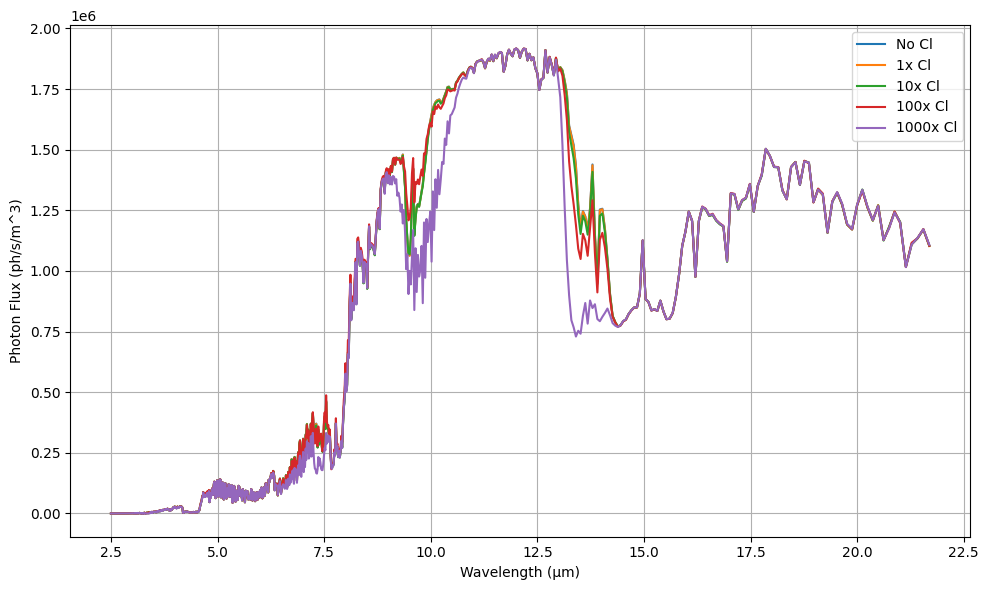

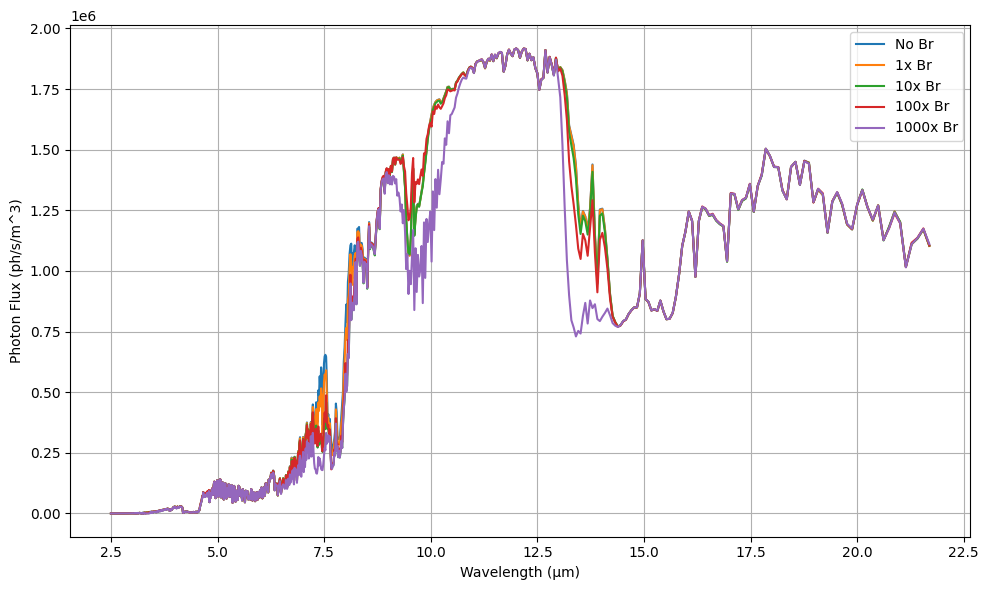

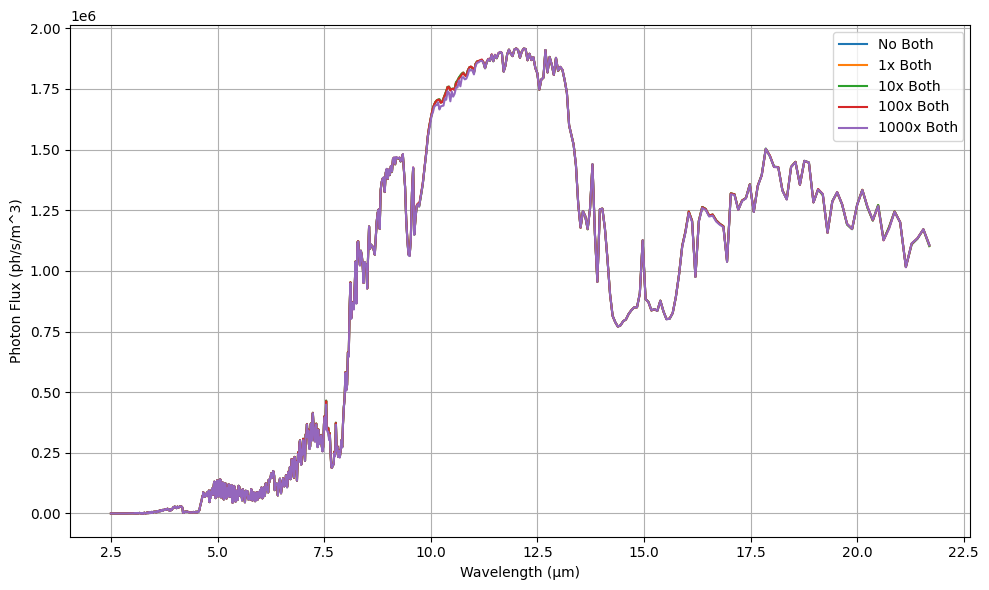

In [44]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

# Figure 5
data = pd.read_csv('CH3X/out_k6v.txt', skiprows=1, sep='\s+',header=None,
                   names=['Wl (um)', 'No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl',
                          'No Br', '1x Br', '10x Br', '100x Br', '1000x Br',
                          'No Both', '1x Both', '10x Both', '100x Both', '1000x Both'])

# Define the columns for each group
groups = {
    'Cl': ['No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl'],
    'Br': ['No Br', '1x Br', '10x Br', '100x Br', '1000x Br'],
    'Both': ['No Both', '1x Both', '10x Both', '100x Both', '1000x Both']
}

for group, columns in groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    for column in columns:
        # Convert wavelength to Astropy quantity
        wavelength_q = data['Wl (um)'].values * u.um
        
        # Convert spectral radiance to Astropy quantity
        spectral_radiance_q = data[column].values * u.W / (u.sr * u.m**2 * u.um)
        
        # Calculate energy per photon
        E_photon = (const.h * const.c / wavelength_q).to(u.J)
        
        # Convert spectral radiance from per um to per m
        spectral_radiance_per_m = spectral_radiance_q.to(u.W / (u.sr * u.m**3))
        
        distance = 5 * u.pc.to(u.m)
        radius = const.R_earth.to(u.m)
        solid_angle = np.pi * radius**2 / distance**2
        
        # Calculate photon flux
        photon_flux = (spectral_radiance_per_m).to(
            u.ph / (u.s * u.m**3 * u.sr),
            equivalencies=u.spectral_density(wavelength_q)
        ) * solid_angle * u.sr
        
        # Plot the data
        ax.plot(data['Wl (um)'], photon_flux, label=column)

    ax.set_xlabel('Wavelength (μm)')
    ax.set_ylabel('Photon Flux (ph/s/m^3)')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()


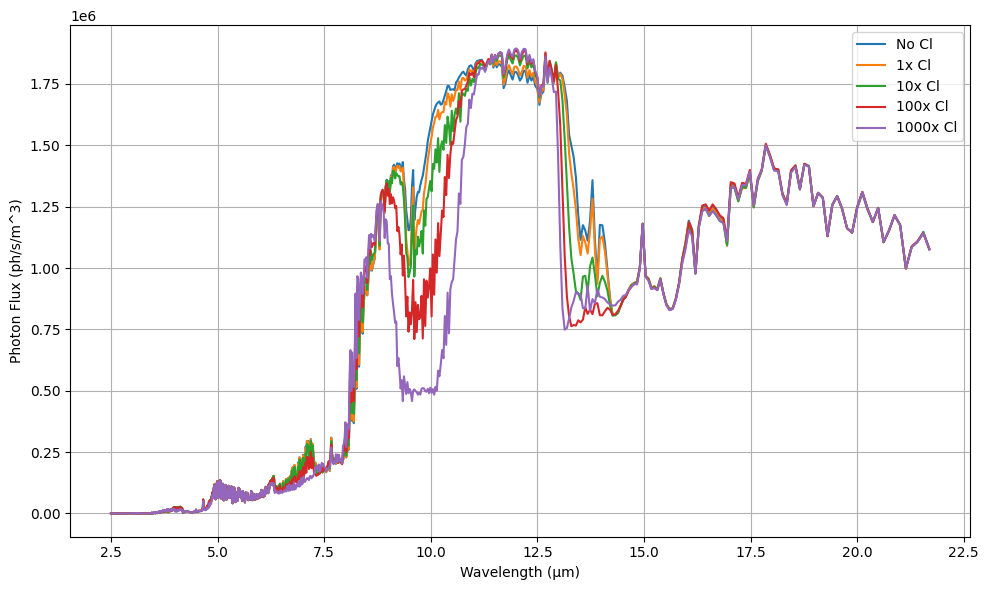

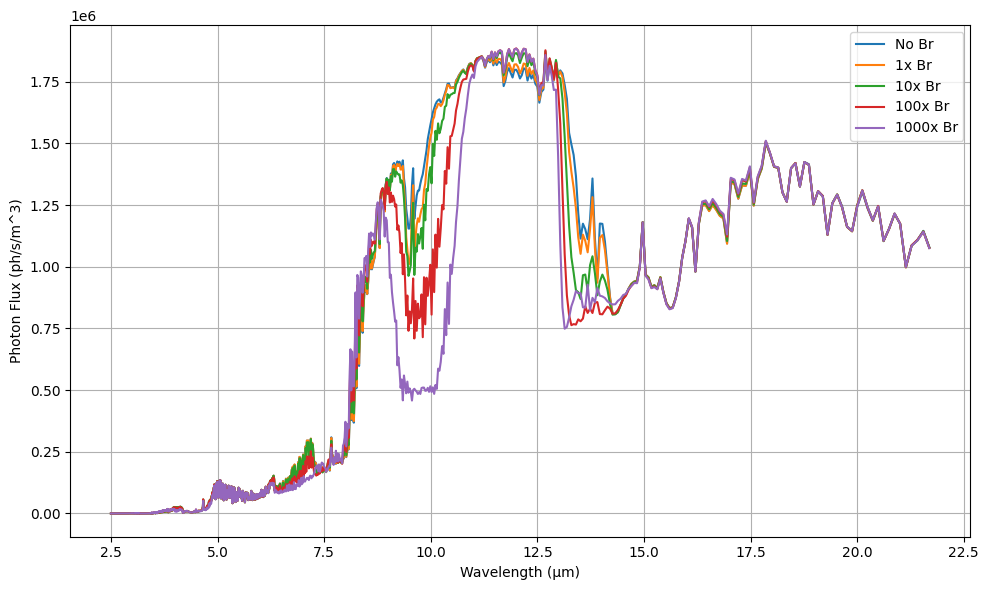

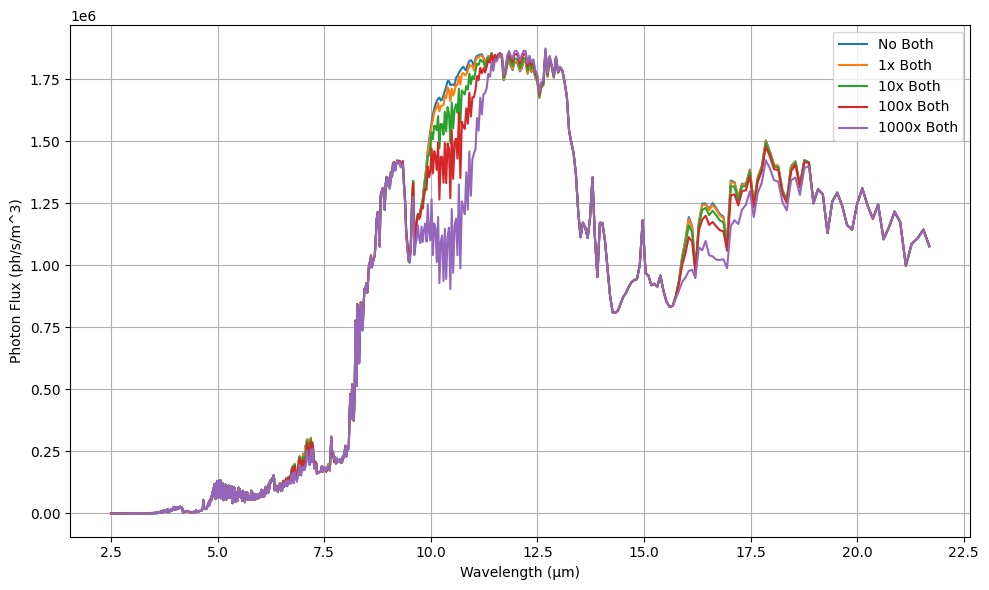

In [46]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
import matplotlib.pyplot as plt

# Figure 6
data = pd.read_csv('CH3X/out_t1e.txt', skiprows=1, sep='\s+',header=None,
                   names=['Wl (um)', 'No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl',
                          'No Br', '1x Br', '10x Br', '100x Br', '1000x Br',
                          'No Both', '1x Both', '10x Both', '100x Both', '1000x Both'])

# Define the columns for each group
groups = {
    'Cl': ['No Cl', '1x Cl', '10x Cl', '100x Cl', '1000x Cl'],
    'Br': ['No Br', '1x Br', '10x Br', '100x Br', '1000x Br'],
    'Both': ['No Both', '1x Both', '10x Both', '100x Both', '1000x Both']
}

for group, columns in groups.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    for column in columns:
        # Convert wavelength to Astropy quantity
        wavelength_q = data['Wl (um)'].values * u.um
        
        # Convert spectral radiance to Astropy quantity
        spectral_radiance_q = data[column].values * u.W / (u.sr * u.m**2 * u.um)
        
        # Calculate energy per photon
        E_photon = (const.h * const.c / wavelength_q).to(u.J)
        
        # Convert spectral radiance from per um to per m
        spectral_radiance_per_m = spectral_radiance_q.to(u.W / (u.sr * u.m**3))
        
        distance = 5 * u.pc.to(u.m)
        radius = const.R_earth.to(u.m)
        solid_angle = np.pi * radius**2 / distance**2
        
        # Calculate photon flux
        photon_flux = (spectral_radiance_per_m).to(
            u.ph / (u.s * u.m**3 * u.sr),
            equivalencies=u.spectral_density(wavelength_q)
        ) * solid_angle * u.sr
        
        # Plot the data
        ax.plot(data['Wl (um)'], photon_flux, label=column)

    ax.set_xlabel('Wavelength (μm)')
    ax.set_ylabel('Photon Flux (ph/s/m^3)')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
